In [2]:
import numpy as np
import pandas as pd
import csv
import os, sys, random, math
import matplotlib.pyplot as plt
import scipy.stats as stats
from scipy.stats import ttest_ind, ttest_1samp
from scipy.stats.distributions import uniform, expon, norm
from statsmodels.distributions.empirical_distribution import ECDF

# Anatomical Abnormalities Associated with Schizophrenia

The dataset we are going to analyze contains data related to physiological indicators associated with schizophrenia. In 1990 researchers published an article based on a study that controlled differences in brains of monozygotic twins, where one of the twins had schizophrenia, and the other had not. The researchers used magnetic resonance imaging to measure the volumes (in cm$^3$) of the left hippocampus of the twins’ brains (see the picture below).
<img src="https://brainigo.com/wp-content/uploads/2018/07/hippocampus.jpg" width="400">

## Task 1
Load the data file, find two observed data groups and separate them. Describe these two data groups. For each group, find mean, variance and median.
### Discussion
The loaded data file contains two groups of data. Group called "Affected" consists of sizes of the left hippocampus of affected twins. Group "Unaffected" contains sizes of the left hippocampus of unaffected twins. Both groups are of size of 15. We can observe that sizes of the left hippocampus tend to be bigger for twins unaffected by schizophrenia. Contrarily, variance is slightly bigger for sizes of the hippocampus affected by schizophrenia.

In [3]:
# Data read from CSV and saved to variables in order to perform various operations

df = pd.read_csv("../data/data.csv", delimiter=";")

# Dataframes
af = df["Affected"]
un = df["Unaffected"]

# NumPy arrays
af_np = np.array(af)
un_np = np.array(un)

# Lists
af_list = list(af)
un_list = list(un)

In [25]:
# Additional helper values required during the computations

# Sizes of the supplements
af_size = len(af_list)
un_size = len(un_list)

# Upper and Lower bounds of values of each supplement
af_lb = math.floor(min(af_list))
af_ub = math.ceil(max(af_list))

un_lb = math.floor(min(un_list))
un_ub = math.ceil(max(un_list))

print('Size of "Affected" group:', af_size)
print('Lower bound:', af_lb)
print('Upper bound:', af_ub)

print()

print('Size of "Unaffected" group:', un_size)
print('Lower bound:', un_lb)
print('Upper bound:', un_ub)

Size of "Affected" group: 15
Lower bound: 1
Upper bound: 3

Size of "Unaffected" group: 15
Lower bound: 1
Upper bound: 3


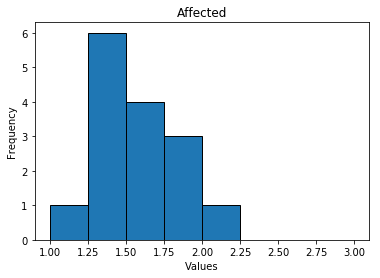

Mean: 1.56
Variance: 0.08
Median: 1.59


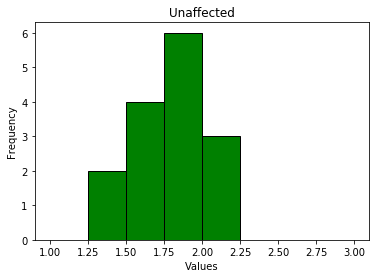

Mean: 1.76
Variance: 0.05
Median: 1.77


In [24]:
# Setting parameters for the histogram describing group Affected

plt.hist(af_np, 8, (af_lb,af_ub), edgecolor = 'black')
plt.xlabel('Values')
plt.ylabel('Frequency')
plt.title('Affected')
plt.show()

# Calculating mean, variance and median of group Affected

af_mean = np.mean(af_np)
af_var = np.var(af_np)
af_median = np.median(af_np)

print("Mean:", round(af_mean, 2))
print("Variance:", round(af_var, 2))
print("Median:", round(af_median, 2))

# Setting parameters for the histogram describing group Unaffected

plt.hist(un_np, 8, (un_lb,un_ub), facecolor = 'g', edgecolor = 'black')
plt.xlabel('Values')
plt.ylabel('Frequency')
plt.title('Unaffected')
plt.show()

# Calculating mean, variance and median of group Unaffected

un_mean = np.mean(un_np)
un_var = np.var(un_np)
un_median = np.median(un_np)

print("Mean:", round(un_mean, 2))
print("Variance:", round(un_var, 2))
print("Median:", round(un_median, 2))

## Task 2

For each group, try to find probability density function (based on histogram) and distribution function (based on ecdf).
### Note
The probability density function is smoothened by Gaussian function.

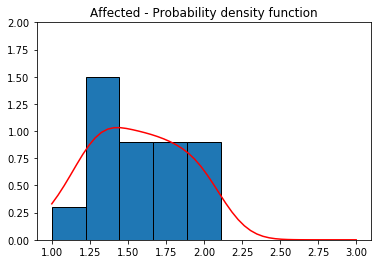

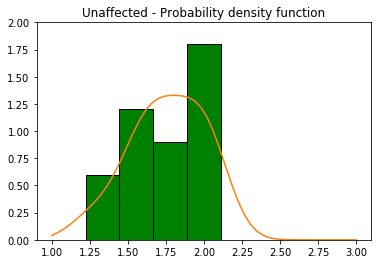

In [26]:
# Non-parametric probability density function of Affected group

nparam_density = stats.kde.gaussian_kde(af.values.ravel())
x = np.linspace(af_lb, af_ub)
nparam_density = nparam_density(x)
fig, ax = plt.subplots()
ax.hist(af.values, 9, (af_lb,af_ub), density=True, edgecolor = 'black')
ax.plot(x, nparam_density, color = 'r')
ax.set_ylim([0, 2])
plt.title('Affected - Probability density function')
plt.show()

# Non-parametric probability density function of Unaffected group

nparam_density = stats.kde.gaussian_kde(un.values.ravel())
x = np.linspace(un_lb, un_ub)
nparam_density = nparam_density(x)
fig, ax = plt.subplots()
ax.hist(un.values, 9, (un_lb,un_ub), density=True, facecolor = 'g', edgecolor = 'black')
ax.plot(x, nparam_density)
ax.set_ylim([0, 2])
plt.title('Unaffected - Probability density function')
plt.show()

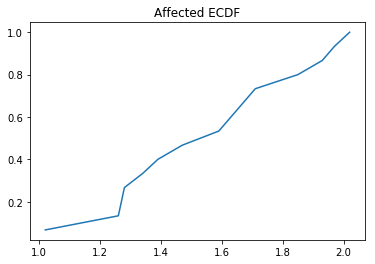

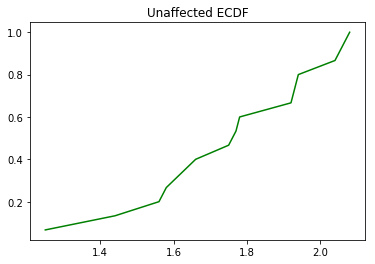

In [27]:
# Empiric distribution function fo af

ecdf = ECDF(af_np)
plt.plot(ecdf.x, ecdf.y)
plt.title('Affected ECDF')
plt.show()

# Empiric distribution function fo un

ecdf = ECDF(un_np)
plt.plot(ecdf.x, ecdf.y, color = 'g')
plt.title('Unaffected ECDF')
plt.show()

## Task 3 

* For each group find probability distribution.
   1. Approximate parameters of normal, exponential and uniform distribution.
   2. Add appropriate probability density functions (PDF) with estimated parameters to the histogram graphs.
   3. Discuss which of the distribution represents observed data the best.
  

### Approximate parameters of normal, exponential and uniform distribution ###

#### Normal distribution ####

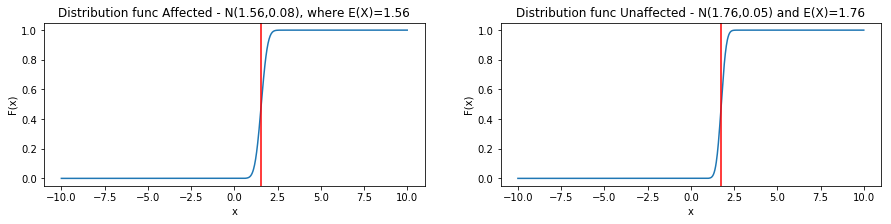

In [33]:
af_sigma = np.sqrt(af_var)
un_sigma = np.sqrt(un_var)

plt.figure(figsize=(15,3))

plt.subplot(1,2,1)
x = np.linspace(-10, 10, 1000)
plt.plot(x, norm.cdf(x, loc=af_mean, scale=af_sigma))
plt.axvline(af_mean, color='r')
plt.title('Distribution func Affected - N({0:.2f},{1:.2f}), where E(X)={2:.2f}'.format(af_mean, af_var, af_mean))
plt.xlabel('x')
plt.ylabel('F(x)')

plt.subplot(1,2,2)
plt.plot(x, norm.cdf(x, loc=un_mean, scale=un_sigma))
plt.axvline(un_mean, color='r')
plt.title('Distribution func Unaffected - N({0:.2f},{1:.2f}) and E(X)={2:.2f}'.format(un_mean, un_var, un_mean))
plt.xlabel('x')
plt.ylabel('F(x)')

plt.show()

#### Exponential distribution ####

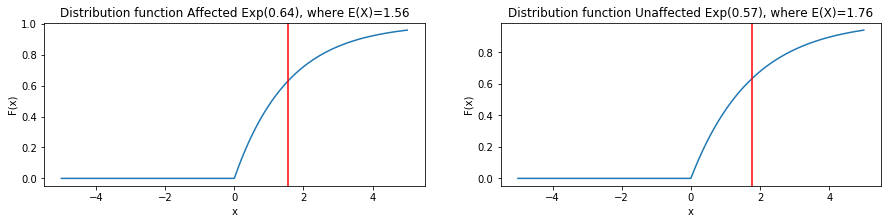

In [34]:
af_lambda = 1 / af_mean
un_lambda = 1 / un_mean

plt.figure(figsize=(15,3))
x = np.linspace(-5, 5, 1000)

plt.subplot(1,2,1)
plt.plot(x, expon.cdf(x, scale=af_mean))
plt.axvline(expon.mean(scale=af_mean), color='r')
plt.title('Distribution function Affected Exp({0:.2f}), where E(X)={1:.2f}'.format(af_lambda, expon.mean(scale=af_mean)))
plt.xlabel('x')
plt.ylabel('F(x)')

plt.subplot(1,2,2)
plt.plot(x, expon.cdf(x, scale=un_mean))
plt.axvline(expon.mean(scale=un_mean), color='r')
plt.title('Distribution function Unaffected Exp({0:.2f}), where E(X)={1:.2f}'.format(un_lambda, expon.mean(scale=un_mean)))
plt.xlabel('x')
plt.ylabel('F(x)')

plt.show()

#### Uniform distribution ####

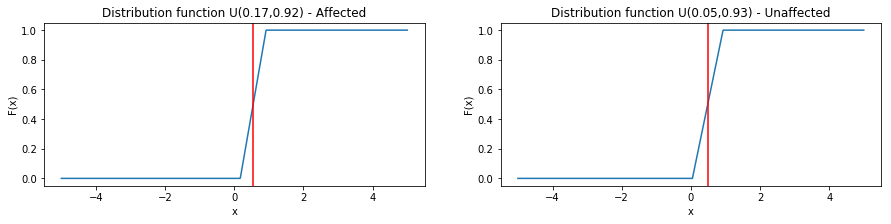

In [35]:
af_x = uniform.rvs(size=af_size)
af_m1 = af_x.mean()
af_m2 = np.mean(af_x**2)
af_a = af_m1 - np.sqrt(3 * (af_m2 - af_m1**2))
af_b = af_m1 + np.sqrt(3 * (af_m2 - af_m1**2))
af_scale = np.abs(af_b-af_a)

un_x = uniform.rvs(size=un_size)
un_m1 = un_x.mean()
un_m2 = np.mean(un_x**2)
un_a = un_m1 - np.sqrt(3 * (un_m2 - un_m1**2))
un_b = un_m1 + np.sqrt(3 * (un_m2 - un_m1**2))
un_scale = np.abs(un_b-un_a)

x = np.linspace(-5, 5, 1000)
plt.figure(figsize=(15,3))

plt.subplot(1,2,1)
plt.plot(x, uniform.cdf(x, af_a, scale=af_scale))
plt.axvline(uniform.mean(af_a, scale=af_scale), color='r')
plt.title('Distribution function U({0:.2f},{1:.2f}) - Affected'.format(af_a, af_b))
plt.xlabel('x')
plt.ylabel('F(x)')

plt.subplot(1,2,2)
plt.plot(x, uniform.cdf(x, un_a, scale=un_scale))
plt.axvline(uniform.mean(un_a, scale=un_scale), color='r')
plt.title('Distribution function U({0:.2f},{1:.2f}) - Unaffected'.format(un_a, un_b))
plt.xlabel('x')
plt.ylabel('F(x)')

plt.show()

### Add appropriate probability density functions (PDF) with estimated parameters to the histogram graphs ###

#### Normal distribution ####

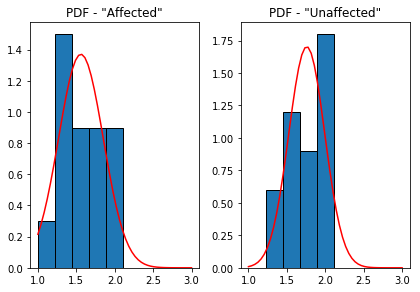

In [30]:
x = np.linspace(af_lb, af_ub)
fig, axs = plt.subplots(1, 2)

fig.tight_layout()

density = norm.pdf(x, loc=af_mean, scale=af_sigma)
axs[0].hist(af.values, 9, (af_lb,af_ub), density=True, edgecolor = 'black')
axs[0].plot(x, density, color = 'r')
axs[0].set_title('PDF - "Affected"')

x = np.linspace(un_lb, un_ub)

density = norm.pdf(x, loc=un_mean, scale=un_sigma)
axs[1].hist(un.values, 9, (un_lb,un_ub), density=True, edgecolor = 'black')
axs[1].plot(x, density, color = 'r')
axs[1].set_title('PDF - "Unaffected"')

plt.show()

#### Exponential distribution ####

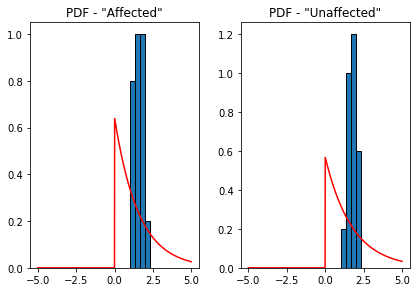

In [29]:
x = np.linspace(-5, 5, 1000)
fig, axs = plt.subplots(1, 2)

fig.tight_layout()

density = expon.pdf(x, scale=af_mean)
axs[0].hist(af.values, 6, (af_lb,af_ub), density=True, edgecolor = 'black')
axs[0].plot(x, density, color = 'r')
axs[0].set_title('PDF - "Affected"')

density = expon.pdf(x, scale=un_mean)
axs[1].hist(un.values, 6, (un_lb,un_ub), density=True, edgecolor = 'black')
axs[1].plot(x, density, color = 'r')
axs[1].set_title('PDF - "Unaffected"')

plt.show()

#### Uniform distribution ####

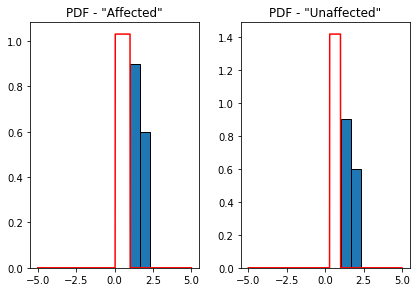

In [28]:
x = np.linspace(-5, 5, 1000)
fig, axs = plt.subplots(1, 2)

fig.tight_layout()

density = uniform.pdf(x, af_a, scale=af_scale)
axs[0].hist(af.values, 3, (af_lb,af_ub), density=True, edgecolor = 'black')
axs[0].plot(x, density, color = 'r')
axs[0].set_title('PDF - "Affected"')

density = uniform.pdf(x, un_a, scale=un_scale)
axs[1].hist(af.values, 3, (un_lb,un_ub), density=True, edgecolor = 'black')
axs[1].plot(x, density, color = 'r')
axs[1].set_title('PDF - "Unaffected"')

plt.show()

### Discuss which of the distribution represents observed data the best

We concluded that it would be preferable to use normal distribution for our case. The main reason for this decision is the fact that we are working with natural science data and we want to represent real-valued random variables whose distributions are not known. Normal distributions are often used in natural and social sciences, so we concluded that it would fit our needs the best.

## Task 4

For each group generate 100 random samples using distribution you chose as the most suitable, with parameters you estimated before. Compare histogram of simulated values with observed values.
### Discussion
For each group we had only 15 values, so histograms with observed values don't remind us of the normal distribution as good as histograms with 100 samples of randomly generated data.

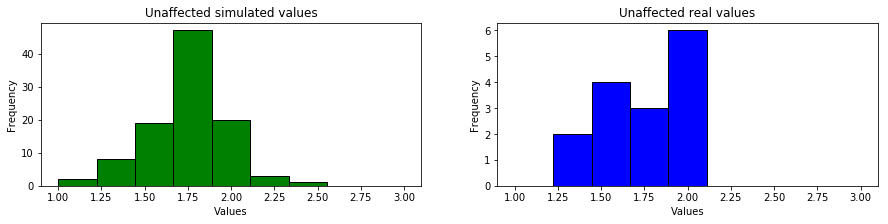

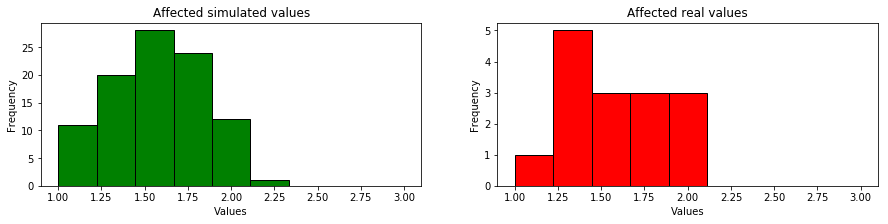

In [14]:
gen_af = np.random.normal(af_mean, af_sigma ,100)
gen_un = np.random.normal(un_mean ,un_sigma ,100)

plt.figure(figsize=(15,3))
plt.subplot(1,2,1)
plt.hist(gen_un, 9, (un_lb,un_ub), facecolor = 'g', edgecolor = 'black')
plt.xlabel('Values')
plt.ylabel('Frequency')
plt.title('Unaffected simulated values')

plt.subplot(1,2,2)
plt.hist(un_np, 9, (un_lb,un_ub), facecolor = 'b', edgecolor = 'black')
plt.xlabel('Values')
plt.ylabel('Frequency')
plt.title('Unaffected real values')

plt.show()

plt.figure(figsize=(15,3))
plt.subplot(1,2,1)
plt.hist(gen_af, 9, (af_lb,af_ub), facecolor = 'g', edgecolor = 'black')
plt.xlabel('Values')
plt.ylabel('Frequency')
plt.title('Affected simulated values')

plt.subplot(1,2,2)
plt.hist(af_np, 9, (af_lb,af_ub), facecolor = 'r', edgecolor = 'black')
plt.xlabel('Values')
plt.ylabel('Frequency')
plt.title('Affected real values')

plt.show()

## Task 5 ##
For each group calculate 95% confidence interval for EX 

In [40]:
def confidence_interval(Xn, sigma):
    n = 15
    alpha = 0.05

    critical_value = norm.isf(alpha/2)

    delta = critical_value * sigma / np.sqrt(n)
    ci = np.array([Xn - delta, Xn + delta])
    return ci
    
print("Confidence interval of Affected group:", confidence_interval(af_mean, af_sigma))
print("Confidence interval of Unaffected group:", confidence_interval(un_mean, un_sigma))

Confidence interval of Affected group: [1.41271407 1.70728593]
Confidence interval of Unaffected group: [1.64014522 1.87718808]


## Task 6 ##
For each group do two-tailed test of hypothesis EX = K on significance level 5%. 
A significance level of 0.05 indicates a 5% risk of concluding that a difference exists when there is no actual difference.

### Approach ###

We are testing, on the 5 % significance level, whether the mean is equal to the given K. K has to lie in the confidence interval of the particular sample mean to accept the hypothesis that it is equal to the sample mean.

We can use `ttest_1samp` function, from the module `SciPy`, which satisfies our needs. We are looking at the resulting probability and if this probability is less than our given alpha, then we can say we do not reject the hypothesis. If it's more, we reject it.

We will use results of the confidence intervals from the previous task.


$ H_0 : EX = K $

$ H_A : EX \ne K $

$ \alpha = 0,05 $

In [16]:
k = 4
alpha = 0.05

af_pvalue = ttest_1samp(af, k)[1]
un_pvalue = ttest_1samp(un, k)[1]

if af_pvalue < alpha:
    print('We reject hypothesis H0 for the "Affected" sample because K = 4 does not lie in confidence interval [1.41271407 1.70728593].')
else:
    print('We accept hypothesis H0 for the "Affected" sample because K = 4 lies in confidence interval [1.41271407 1.70728593].')

print()    

if un_pvalue < alpha:
    print('We reject hypothesis H0 for the "Unaffected" sample because K = 4 does not lie in confidence interval [1.64014522 1.87718808].')
else:
    print('We accept hypothesis H0 for the "Unaffected" sample because K = 4 lies in confidence interval [1.64014522 1.87718808].')

We reject hypothesis H0 for the "Affected" sample because K = 4 does not lie in confidence interval [1.41271407 1.70728593].

We reject hypothesis H0 for the "Unaffected" sample because K = 4 does not lie in confidence interval [1.64014522 1.87718808].


## Task 7 

Test whether the observed groups have the same mean on the 5 % significance level. Specify types of tests and alternatives, so your choice suits the best the character of the investigated problem.

### Approach ###

We are testing, on the 5 % significance level, whether the mean from the first sample confidence interval lies in the confidence interval of the second sample and analogically for the second sample mean.

Both of the means have to lie in the confidence interval of the other mean, on the 5 % significance level, otherwise we are rejecting the hypothesis that the means are equal in a favor of hypothesis that they are not.

For this purpose, we can use `ttest_ind` function, from the `module SciPy`, which directly tests this hypothesis in both directions. 

In [17]:
alpha = 0.05
pvalue = ttest_ind(af, un)[1]

if pvalue < alpha:
    print('The probablity value is less than or equal to our alpha so we can reject this hypothesis, on the 5 % level of significance, in favor of hypothesis that means are equal.')
else:
     print('The probablity value is greater than our alpha so we are not rejecting the hypothesis, on the 5 % level of significance, that the means are equal.')

The probablity value is greater than our alpha so we are not rejecting the hypothesis, on the 5 % level of significance, that the means are equal.
